### convert json data to csv

In [1]:
import pandas as pd
import json 
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
f=open('D:\machine learning\data-viz-challenge-master\data.json')
data=json.load(f)
f.close()
df= pd.json_normalize(data['data'])
df.to_csv('D:\machine learning\data-viz-challenge-master\data1.csv', sep=',',encoding='utf-8')

In [2]:
df.head()

,category,event_name,gender,age,marital_status,session_id,device,client_time,location.latitude,location.city,location.state,location.longitude,location.zip_code,amount
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632004,40.189788,Lyons,CO,-105.355280,80540,NaN
1,Technology,View Project,M,18-24,single,4459d001feb8438eae5f4ec24abcd992,iOS,1393632022,33.844371,Alpharetta,GA,-84.474050,30009,NaN
2,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,1393632032,42.446396,Westford,MA,-71.459405,01886,NaN
3,Technology,View Project,M,18-24,single,68195e2372bd4022b17220fc21de9138,android,1393632038,44.624413,Saranac,NY,-73.809266,12981,NaN
4,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,1393632051,36.747083,Lampe,MO,-93.458626,65681,NaN


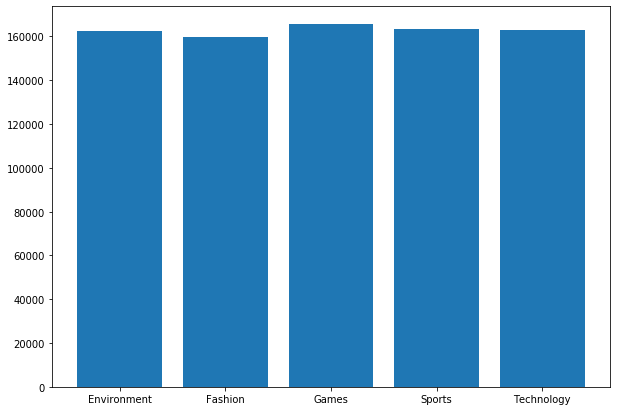

In [3]:
name = df.groupby('category')[['amount']].sum()
fig = plt.figure(figsize =(10, 7)) 
plt.bar(name.index,name['amount'])  
plt.show()

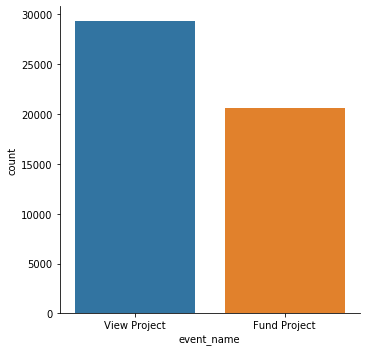

In [4]:
sns.catplot(x="event_name", kind="count", data=df)

## People tend to buy projects of same category. As bicycle project belongs two "Environment" and "sports" category we drop the other rows. we are intrested for funding of the project, so we only consider the funded projects

In [5]:
df.dropna(inplace=True)

In [6]:
ind = df[(df['category']!='Sports')&(df['category']!='Environment')].index
df.drop(ind,inplace=True)

In [7]:
df.reset_index(drop=True,inplace=True)

### PEOPLE WHO HAVE FUNDED SPORTS AND ENVIRONMENT PROJECT

In [8]:
df.head()

,category,event_name,gender,age,marital_status,session_id,device,client_time,location.latitude,location.city,location.state,location.longitude,location.zip_code,amount
0,Sports,Fund Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632200,40.189788,Lyons,CO,-105.355280,80540,31.0
1,Sports,Fund Project,M,18-24,married,be389e9be0e74398adcef3292ac409ee,android,1393632395,45.408374,Lake Oswego,OR,-122.691388,97034,40.0
2,Sports,Fund Project,F,18-24,single,71ca342ead4f4da180da4f9b4baaf760,android,1393633118,33.844371,Alpharetta,GA,-84.474050,30009,53.0
3,Sports,Fund Project,F,18-24,married,a1fdfe0bebed4510a9059bcfb3ba1325,iOS,1393633458,33.794055,Atlanta,GA,-84.377326,30308,48.0
4,Sports,Fund Project,M,45-54,single,d23a964e8656403b853eb2a24139c408,android,1393633861,39.102704,Kansas City,MO,-94.595033,64105,27.0


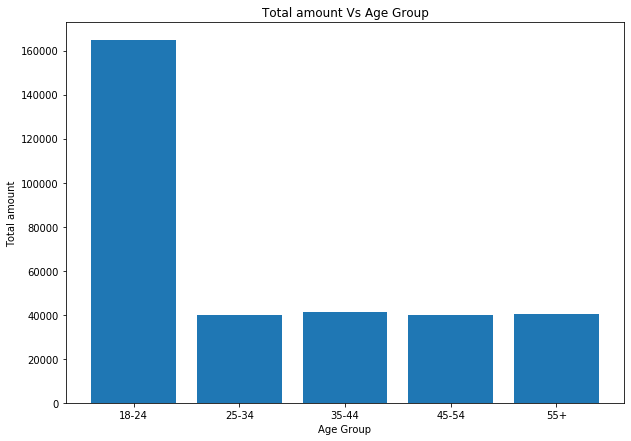

In [9]:
name = df.groupby('age')[['amount']].sum()
fig = plt.figure(figsize =(10, 7)) 
plt.title('Total amount Vs Age Group')
plt.xlabel("Age Group")
plt.ylabel("Total amount")
plt.bar(name.index,name['amount'])  
plt.show()

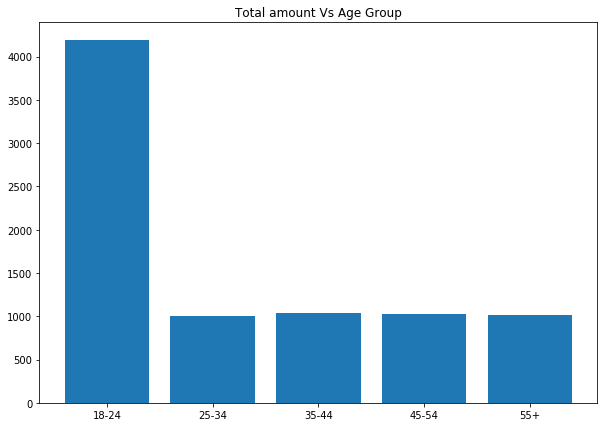

In [14]:
name = df.groupby('age')[['amount']].count()
fig = plt.figure(figsize =(10, 7)) 
plt.title("no of people funding Vs Age Group")
plt.xlabel("Age Group")
plt.ylabel("no of people funding")        
plt.bar(name.index,name['amount'])  
plt.show()

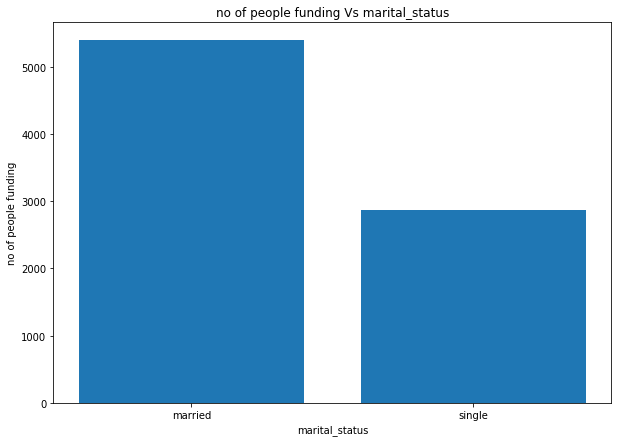

In [10]:
name = df.groupby('marital_status')[['amount']].count()
fig = plt.figure(figsize =(10, 7)) 
plt.title('no of people funding Vs marital_status')
plt.xlabel("marital_status")
plt.ylabel("no of people funding")
plt.bar(name.index,name['amount'])  
plt.show()

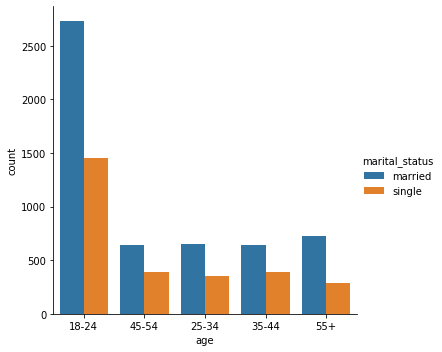

In [11]:
import seaborn as sns
sns.catplot(x="age", kind="count",hue="marital_status", data=df)

## Age group of 18-24 tend to fund projects 
## married people also tend to fund more projects than the single ones
## From the above plot we can see that we can target the age group of 18-24 who are married

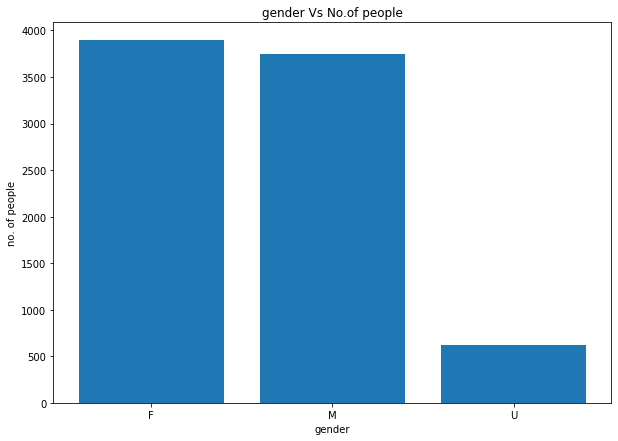

In [12]:
name = df.groupby('gender')[['amount']].count()
fig = plt.figure(figsize =(10, 7))
plt.title("gender Vs No.of people")
plt.xlabel("gender") 
plt.ylabel("no. of people")   
plt.bar(name.index,name['amount'])  
plt.show()

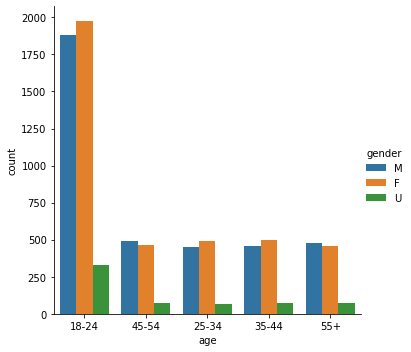

In [13]:
sns.catplot(x="age", kind="count",hue="gender", data=df)

### there is no significant difference of funding projects between male and female 

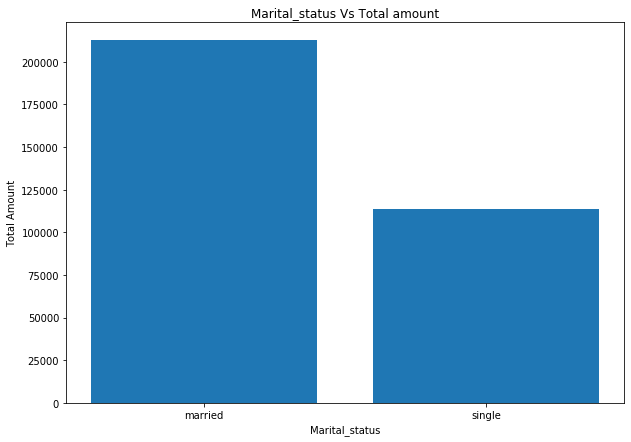

In [14]:
name = df.groupby('marital_status')[['amount']].sum()
fig = plt.figure(figsize =(10, 7)) 
plt.title('Marital_status Vs Total amount')
plt.xlabel("Marital_status") 
plt.ylabel("Total Amount")  
plt.bar(name.index,name['amount'])  
plt.show()

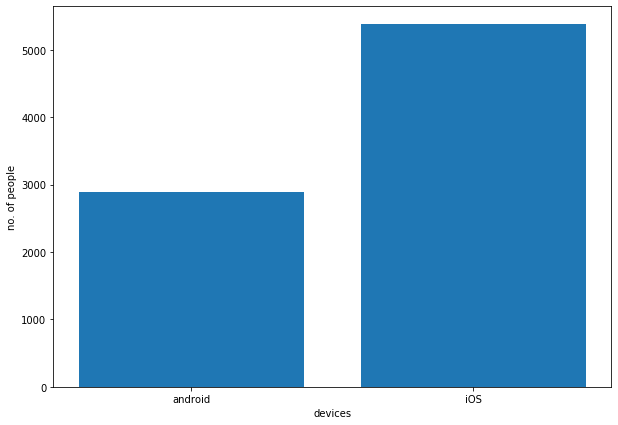

In [15]:
name = df.groupby('device')[['amount']].count()
fig = plt.figure(figsize =(10, 7)) 
plt.xlabel("devices") 
plt.ylabel("no. of people") 
# Horizontal Bar Plot 
plt.bar(name.index,name['amount'])  
plt.show()

In [20]:
name = df.groupby('location.state')[['amount']].count()

In [21]:
name.sort_values('amount', ascending=False)

,amount
location.state,
IN,1548
GA,1281
OR,1163
CO,930
CA,420
TX,293
NY,232
FL,219
IL,151


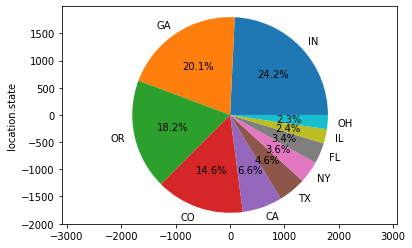

In [22]:
df['location.state'].value_counts().head(10).plot.pie(autopct='%1.1f%%',radius=1800,frame=True)
plt.axis('equal')
plt.show()


### People from  IN, GA, OR, CO states seems to fund the project than other states 

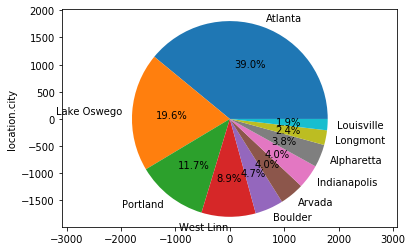

In [23]:
df['location.city'].value_counts().head(10).plot.pie(autopct='%1.1f%%',radius=1800,frame=True)
plt.axis('equal') 
plt.show()

### People from Atlanta,Lake Oswego, Portland, West Linn seems to fund the project than other cities

# So the user who are from age group 18-25 , married and from state IN, GA, OR, CO as well as the users from Atlanta,Lake Oswego, Portland, West Linn would be interested in funding the bicycle project